# Time series graphs of YoY% Change of HPI versus implied Turnover
## YoY = Year over Year
## Implied turnover = EHS/(Stocks/1000)

In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#Import the data that shows the total home sales per month in millions in the US beginning January 1999.
#Look at the data

HomeSales = pd.read_csv('./Existing_Home_Sales.csv')
print(HomeSales.info())
HomeSales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EOM     282 non-null    object 
 1   EHS     282 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB
None


,EOM,EHS
0,1/31/99,5.23
1,2/28/99,5.10
2,3/31/99,5.15
3,4/30/99,5.08
4,5/31/99,5.19


In [33]:
#Convert the EHS column to datetime

HomeSales['EOM'] = pd.to_datetime(HomeSales['EOM'])

In [34]:
# Rename the EOM column to Date

HomeSales['Date'] = HomeSales['EOM']

In [35]:
# Delete the old column claled EOM

HomeSales.drop('EOM', inplace=True, axis=1)

In [36]:
# Make new columns for the year, month

HomeSales["Month"] = pd.to_datetime(HomeSales['Date']).dt.month
HomeSales["Year"] = pd.to_datetime(HomeSales['Date']).dt.year

In [37]:
# Make a new column for the quarter:

HomeSales["Q"] = np.ceil(HomeSales["Month"]/3)

In [38]:
#Look at how recent the data is

HomeSales.tail()

,EHS,Date,Month,Year,Q
277,5.93,2022-02-28,2,2022,1.0
278,5.75,2022-03-31,3,2022,1.0
279,5.60,2022-04-30,4,2022,2.0
280,5.41,2022-05-31,5,2022,2.0
281,5.40,2022-06-30,6,2022,2.0


In [39]:
# The data that we have for the stocks ends in 2022 Q1, so let's truncate the 2022 Q2 data:

HomeSales = HomeSales.drop(labels=[279,280,281], axis=0)
HomeSales.tail()

,EHS,Date,Month,Year,Q
274,6.33,2021-11-30,11,2021,4.0
275,6.09,2021-12-31,12,2021,4.0
276,6.49,2022-01-31,1,2022,1.0
277,5.93,2022-02-28,2,2022,1.0
278,5.75,2022-03-31,3,2022,1.0


In [40]:
# Now import the Quarterly stock data
#Then look at only the colum HS_US

StockQuarterly = pd.read_csv('./Stock_Quarterly.csv')
StockQuarterly = StockQuarterly[['Year', 'Quarter', 'HS_US']]
print(StockQuarterly.info())
StockQuarterly.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     93 non-null     int64
 1   Quarter  93 non-null     int64
 2   HS_US    93 non-null     int64
dtypes: int64(3)
memory usage: 2.3 KB
None


,Year,Quarter,HS_US
0,1999,1,118445
1,1999,2,119306
2,1999,3,119595
3,1999,4,118827
4,2000,1,119105


In [41]:
# Now we would like to get the aggregate Housing sales in each quarter and then add them to StockQuarterly:
#First we make a list that we will add

HomeSalesQuarterly_list = HomeSales.groupby(['Year', 'Q']).sum()['EHS'].tolist()

In [42]:
print(HomeSales.head(15))
print(HomeSales.tail(15))
HomeSalesQuarterly_list

     EHS       Date  Month  Year    Q
0   5.23 1999-01-31      1  1999  1.0
1   5.10 1999-02-28      2  1999  1.0
2   5.15 1999-03-31      3  1999  1.0
3   5.08 1999-04-30      4  1999  2.0
4   5.19 1999-05-31      5  1999  2.0
5   5.43 1999-06-30      6  1999  2.0
6   5.25 1999-07-31      7  1999  3.0
7   5.23 1999-08-31      8  1999  3.0
8   5.12 1999-09-30      9  1999  3.0
9   5.11 1999-10-31     10  1999  4.0
10  5.09 1999-11-30     11  1999  4.0
11  5.08 1999-12-31     12  1999  4.0
12  5.23 2000-01-31      1  2000  1.0
13  5.12 2000-02-29      2  2000  1.0
14  5.19 2000-03-31      3  2000  1.0
      EHS       Date  Month  Year    Q
264  6.65 2021-01-31      1  2021  1.0
265  6.17 2021-02-28      2  2021  1.0
266  6.04 2021-03-31      3  2021  1.0
267  5.96 2021-04-30      4  2021  2.0
268  5.92 2021-05-31      5  2021  2.0
269  5.97 2021-06-30      6  2021  2.0
270  6.03 2021-07-31      7  2021  3.0
271  5.99 2021-08-31      8  2021  3.0
272  6.18 2021-09-30      9  2021  3.0
27

[15.48,
 15.7,
 15.600000000000001,
 15.280000000000001,
 15.540000000000001,
 15.440000000000001,
 15.57,
 15.7,
 15.780000000000001,
 16.02,
 16.14,
 15.98,
 17.39,
 16.82,
 16.29,
 17.38,
 17.91,
 17.72,
 19.369999999999997,
 19.11,
 19.3,
 20.5,
 20.22,
 20.7,
 20.939999999999998,
 21.38,
 21.62,
 20.97,
 20.39,
 19.76,
 18.94,
 19.1,
 16.990000000000002,
 15.68,
 14.52,
 13.3,
 12.45,
 12.34,
 12.61,
 11.87,
 11.65,
 12.0,
 13.440000000000001,
 14.86,
 12.95,
 14.15,
 10.97,
 12.12,
 12.84,
 12.47,
 12.9,
 13.120000000000001,
 13.58,
 13.66,
 14.0,
 14.64,
 15.11,
 15.34,
 15.669999999999998,
 14.82,
 14.2,
 14.65,
 14.98,
 15.25,
 15.25,
 15.780000000000001,
 16.21,
 15.5,
 16.03,
 16.38,
 16.240000000000002,
 16.59,
 16.73,
 16.64,
 16.3,
 16.65,
 16.42,
 16.35,
 15.89,
 15.35,
 15.53,
 16.16,
 16.21,
 16.0,
 16.4,
 13.350000000000001,
 18.34,
 19.57,
 18.86,
 17.85,
 18.2,
 18.61,
 18.17]

In [43]:
#Put everything into the StockQuarterly data frame. Now we can compute the implied turnover

StockQuarterly['Quarterly_home_sales'] = HomeSalesQuarterly_list
StockQuarterly['implied_turnover'] = 1000* StockQuarterly['Quarterly_home_sales'] / StockQuarterly['HS_US']

In [44]:
#For plotting purposes, make a new quantity representing the end of the quarter:

StockQuarterly['time'] = StockQuarterly['Year'] + StockQuarterly['Quarter']/4
StockQuarterly

,Year,Quarter,HS_US,Quarterly_home_sales,implied_turnover,time
0,1999,1,118445,15.48,0.130694,1999.25
1,1999,2,119306,15.70,0.131594,1999.50
2,1999,3,119595,15.60,0.130440,1999.75
3,1999,4,118827,15.28,0.128590,2000.00
4,2000,1,119105,15.54,0.130473,2000.25
...,...,...,...,...,...,...
88,2021,1,141533,18.86,0.133255,2021.25
89,2021,2,141794,17.85,0.125887,2021.50
90,2021,3,142100,18.20,0.128079,2021.75
91,2021,4,142406,18.61,0.130683,2022.00


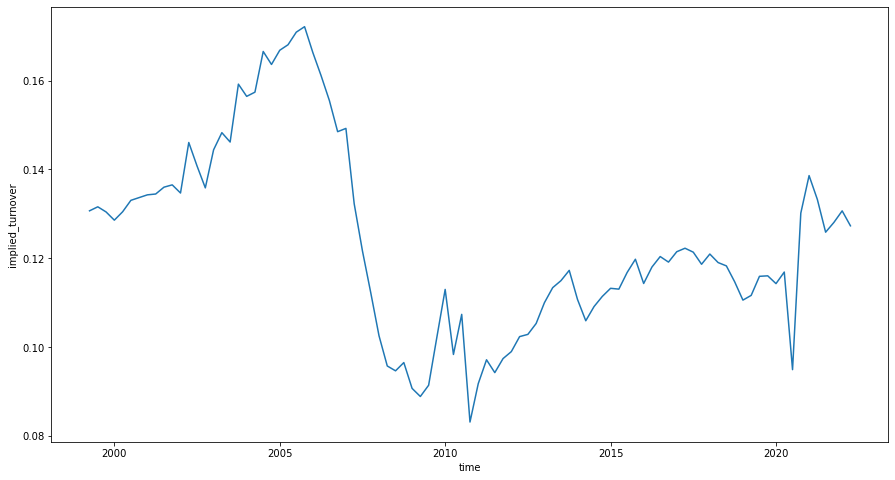

In [45]:
# Now let's plot the implied turnover from 1999 to the present:


sns.lineplot(x = "time", y = "implied_turnover",
             data = StockQuarterly)
plt.gcf().set_size_inches(15, 8)

In [46]:
# now it is time to look at the HPU info

HPI = pd.read_csv('./HPI_Case_Shiller.csv')
print(HPI.info())
HPI.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          412 non-null    object 
 1   PresentHPI    412 non-null    float64
 2   LastYearsHPI  412 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.8+ KB
None


,DATE,PresentHPI,LastYearsHPI
0,1988-01-01,68.859,63.965
1,1988-02-01,69.263,64.424
2,1988-03-01,69.639,64.735
3,1988-04-01,69.977,65.132
4,1988-05-01,70.426,65.565
5,1988-06-01,70.888,66.073
6,1988-07-01,71.354,66.508
7,1988-08-01,71.799,66.939
8,1988-09-01,72.240,67.331
9,1988-10-01,72.636,67.739


In [47]:
# Now, let's convert the date to date.time 

HPI['DATE'] = pd.to_datetime(HPI['DATE'])
HPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          412 non-null    datetime64[ns]
 1   PresentHPI    412 non-null    float64       
 2   LastYearsHPI  412 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.8 KB


In [48]:
# Now let's make month and year columns

HPI["Month"] = pd.to_datetime(HPI['DATE']).dt.month
HPI["Year"] = pd.to_datetime(HPI['DATE']).dt.year
HPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          412 non-null    datetime64[ns]
 1   PresentHPI    412 non-null    float64       
 2   LastYearsHPI  412 non-null    float64       
 3   Month         412 non-null    int64         
 4   Year          412 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 16.2 KB


In [49]:
HPI

,DATE,PresentHPI,LastYearsHPI,Month,Year
0,1988-01-01,68.859,63.965,1,1988
1,1988-02-01,69.263,64.424,2,1988
2,1988-03-01,69.639,64.735,3,1988
3,1988-04-01,69.977,65.132,4,1988
4,1988-05-01,70.426,65.565,5,1988
...,...,...,...,...,...
407,2021-12-01,280.152,235.658,12,2021
408,2022-01-01,284.767,238.772,1,2022
409,2022-02-01,290.433,241.888,2,2022
410,2022-03-01,296.572,245.847,3,2022


In [50]:
#Now let's calculate the Year over Year percent change for HPI

HPI['YoYChange'] = HPI['PresentHPI']/HPI['LastYearsHPI'] - 1
HPI

,DATE,PresentHPI,LastYearsHPI,Month,Year,YoYChange
0,1988-01-01,68.859,63.965,1,1988,0.076511
1,1988-02-01,69.263,64.424,2,1988,0.075112
2,1988-03-01,69.639,64.735,3,1988,0.075755
3,1988-04-01,69.977,65.132,4,1988,0.074387
4,1988-05-01,70.426,65.565,5,1988,0.074140
...,...,...,...,...,...,...
407,2021-12-01,280.152,235.658,12,2021,0.188808
408,2022-01-01,284.767,238.772,1,2022,0.192631
409,2022-02-01,290.433,241.888,2,2022,0.200692
410,2022-03-01,296.572,245.847,3,2022,0.206328


In [51]:
# Now, let's make a time quantity so that we have a way to plot the time series:

HPI['time'] = HPI['Year'] + HPI['Month']/12
HPI

,DATE,PresentHPI,LastYearsHPI,Month,Year,YoYChange,time
0,1988-01-01,68.859,63.965,1,1988,0.076511,1988.083333
1,1988-02-01,69.263,64.424,2,1988,0.075112,1988.166667
2,1988-03-01,69.639,64.735,3,1988,0.075755,1988.250000
3,1988-04-01,69.977,65.132,4,1988,0.074387,1988.333333
4,1988-05-01,70.426,65.565,5,1988,0.074140,1988.416667
...,...,...,...,...,...,...,...
407,2021-12-01,280.152,235.658,12,2021,0.188808,2022.000000
408,2022-01-01,284.767,238.772,1,2022,0.192631,2022.083333
409,2022-02-01,290.433,241.888,2,2022,0.200692,2022.166667
410,2022-03-01,296.572,245.847,3,2022,0.206328,2022.250000


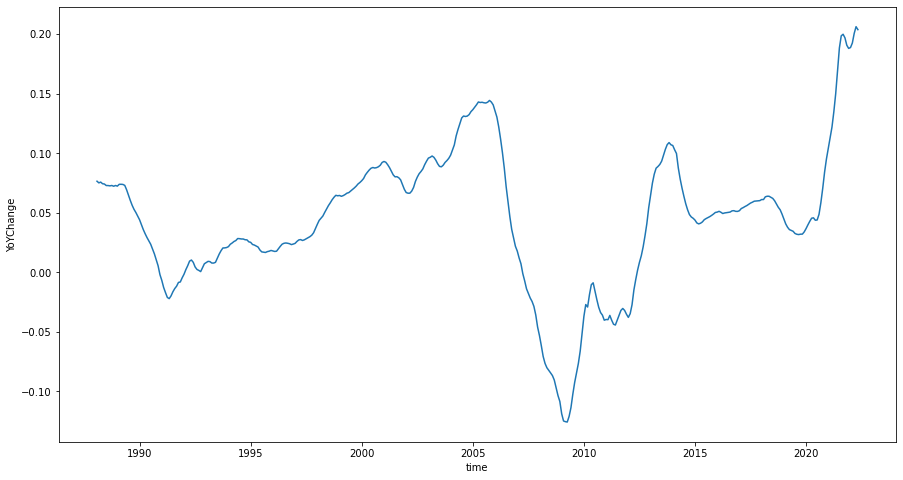

In [52]:
#This is a plot of the YoY HPI percent change from 1988-present, using Case Shilling

sns.lineplot(x = "time", y = "YoYChange",
             data = HPI)
plt.gcf().set_size_inches(15, 8)

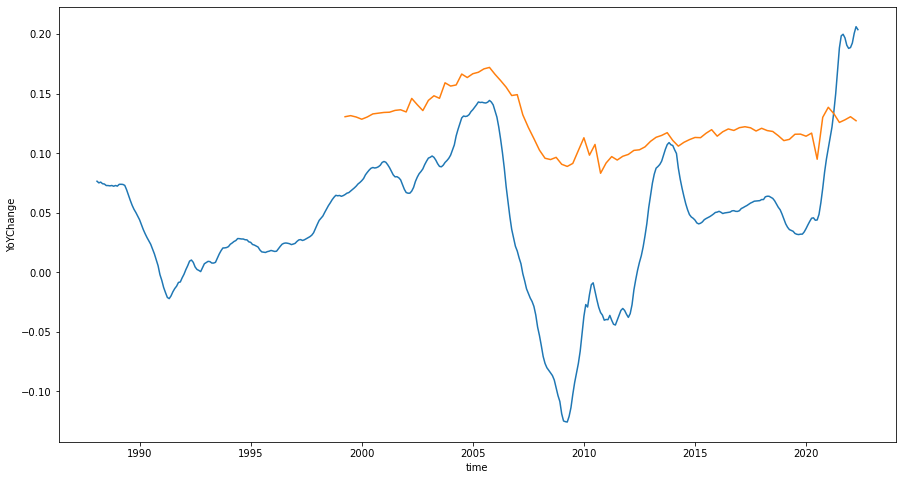

In [53]:
#Below plots the YoY  HPI change in blue from 1988-present using Case Shilling
#the orange plots the implied turnover from 1999-present

sns.lineplot(x = "time", y = "YoYChange",
             data = HPI)
sns.lineplot(x = "time", y = "implied_turnover",
             data = StockQuarterly)
plt.gcf().set_size_inches(15, 8)

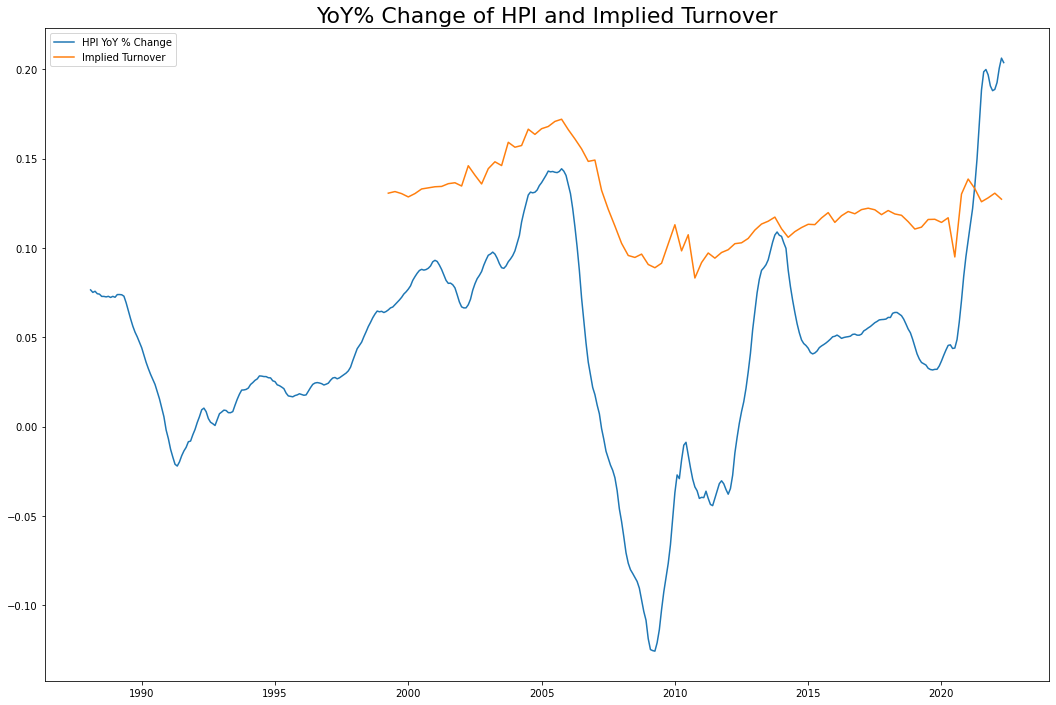

In [54]:
#Here I just play around with different plotting methods. 
#This is the same plot as above but it features a title and a legend

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY % Change")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("YoY% Change of HPI and Implied Turnover", size = 22)
plt.legend();

# Now I am going to make the same graphs, except  instead of using HPI from Case - Shilling, I will use the Purchase Only data

In [56]:
# Now let's do the same plots using HPI from Purchase Only:

HPI_PO = pd.read_csv('./HPI_Purchase_only.csv')
print(HPI_PO.info())
HPI_PO.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Year                                                       121 non-null    int64  
 1   Quarter                                                    121 non-null    int64  
 2   Not Seasonally-Adjusted
Purchase-Only Index 
(1991Q1=100)  121 non-null    float64
 3   Seasonally-Adjusted Purchase-Only Index 
(1991Q1=100)      121 non-null    float64
 4   YoYChange_not_seasonally_adjusted                          121 non-null    object 
 5   YoYChange_seasonally_adjusted                              121 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 5.8+ KB
None


,Year,Quarter,Not Seasonally-Adjusted\nPurchase-Only Index \n(1991Q1=100),Seasonally-Adjusted Purchase-Only Index \n(1991Q1=100),YoYChange_not_seasonally_adjusted,YoYChange_seasonally_adjusted
0,1992,1,102.26,102.28,2.26%,2.28%
1,1992,2,102.66,102.13,2.14%,2.13%
2,1992,3,103.67,102.99,2.83%,2.80%
3,1992,4,104.19,103.80,2.68%,2.70%
4,1993,1,103.81,103.85,1.51%,1.54%
5,1993,2,105.44,104.88,2.71%,2.69%
6,1993,3,106.43,105.68,2.66%,2.61%
7,1993,4,107.02,106.67,2.72%,2.77%
8,1994,1,107.58,107.65,3.63%,3.66%
9,1994,2,109.14,108.52,3.51%,3.48%


In [57]:
# I want to get rid of the percentage signs in the last two columns

HPI_PO['YoYChange_not_seasonally_adjusted'] = HPI_PO['YoYChange_not_seasonally_adjusted'].str.rstrip("%").astype(float)/100
HPI_PO['YoYChange_seasonally_adjusted'] = HPI_PO['YoYChange_seasonally_adjusted'].str.rstrip("%").astype(float)/100
HPI_PO

,Year,Quarter,Not Seasonally-Adjusted\nPurchase-Only Index \n(1991Q1=100),Seasonally-Adjusted Purchase-Only Index \n(1991Q1=100),YoYChange_not_seasonally_adjusted,YoYChange_seasonally_adjusted
0,1992,1,102.26,102.28,0.0226,0.0228
1,1992,2,102.66,102.13,0.0214,0.0213
2,1992,3,103.67,102.99,0.0283,0.0280
3,1992,4,104.19,103.80,0.0268,0.0270
4,1993,1,103.81,103.85,0.0151,0.0154
...,...,...,...,...,...,...
116,2021,1,315.40,315.89,0.1312,0.1306
117,2021,2,336.16,332.15,0.1774,0.1777
118,2021,3,349.88,346.25,0.1859,0.1859
119,2021,4,358.25,358.63,0.1770,0.1770


In [58]:
# Now let's make a time parameter for plotting the time series:

HPI_PO['time'] = HPI_PO['Year'] + HPI_PO['Quarter']/4
HPI_PO

,Year,Quarter,Not Seasonally-Adjusted\nPurchase-Only Index \n(1991Q1=100),Seasonally-Adjusted Purchase-Only Index \n(1991Q1=100),YoYChange_not_seasonally_adjusted,YoYChange_seasonally_adjusted,time
0,1992,1,102.26,102.28,0.0226,0.0228,1992.25
1,1992,2,102.66,102.13,0.0214,0.0213,1992.50
2,1992,3,103.67,102.99,0.0283,0.0280,1992.75
3,1992,4,104.19,103.80,0.0268,0.0270,1993.00
4,1993,1,103.81,103.85,0.0151,0.0154,1993.25
...,...,...,...,...,...,...,...
116,2021,1,315.40,315.89,0.1312,0.1306,2021.25
117,2021,2,336.16,332.15,0.1774,0.1777,2021.50
118,2021,3,349.88,346.25,0.1859,0.1859,2021.75
119,2021,4,358.25,358.63,0.1770,0.1770,2022.00


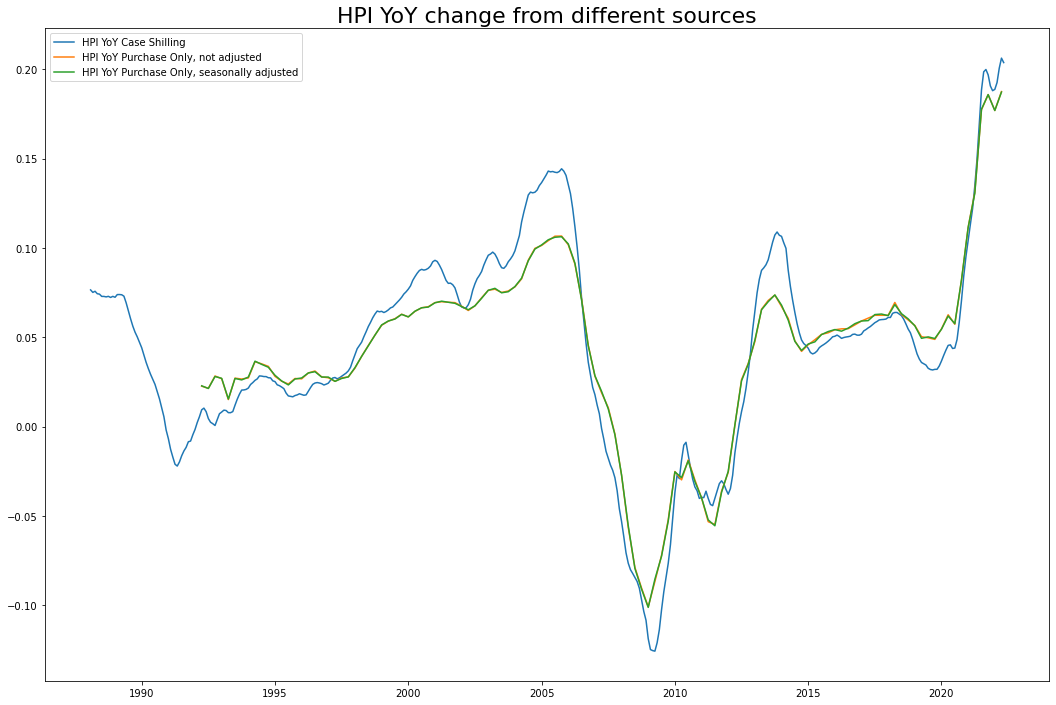

In [60]:
#Now, let's plot three different measures of HPI YoY % Change:

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY Case Shilling")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_not_seasonally_adjusted, label = "HPI YoY Purchase Only, not adjusted")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_seasonally_adjusted, label = "HPI YoY Purchase Only, seasonally adjusted")
plt.title("HPI YoY change from different sources", size = 22)
plt.legend();

In [62]:
#Now let's look at the HPI from the Fred source

HPI_Fred = pd.read_csv('./HPI_Fred.csv')
print(HPI_Fred.info())
HPI_Fred.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          185 non-null    object 
 1   HPI           185 non-null    float64
 2   Previous_HPI  185 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.5+ KB
None


,DATE,HPI,Previous_HPI
0,1976-01-01,62.86,60.02
1,1976-04-01,65.45,60.96
2,1976-07-01,66.53,61.16
3,1976-10-01,67.26,62.22
4,1977-01-01,69.49,62.86
5,1977-04-01,72.72,65.45
6,1977-07-01,74.34,66.53
7,1977-10-01,77.19,67.26
8,1978-01-01,79.58,69.49
9,1978-04-01,82.74,72.72


In [64]:
#Let's change the date to .datetime
#LEt's make a year and a month and a time column
#Also, let's make YoY HPI % change

HPI_Fred['DATE'] = pd.to_datetime(HPI_Fred['DATE'])
HPI_Fred["Month"] = pd.to_datetime(HPI_Fred['DATE']).dt.month
HPI_Fred["Year"] = pd.to_datetime(HPI_Fred['DATE']).dt.year
HPI_Fred["time"] = HPI_Fred["Year"] + HPI_Fred["Month"]/12
HPI_Fred["YoY"] = HPI_Fred["HPI"]/HPI_Fred["Previous_HPI"] -1
HPI_Fred

,DATE,HPI,Previous_HPI,Month,Year,time,YoY
0,1976-01-01,62.86,60.02,1,1976,1976.083333,0.047318
1,1976-04-01,65.45,60.96,4,1976,1976.333333,0.073655
2,1976-07-01,66.53,61.16,7,1976,1976.583333,0.087802
3,1976-10-01,67.26,62.22,10,1976,1976.833333,0.081003
4,1977-01-01,69.49,62.86,1,1977,1977.083333,0.105472
...,...,...,...,...,...,...,...
180,2021-01-01,484.29,450.42,1,2021,2021.083333,0.075196
181,2021-04-01,511.22,454.83,4,2021,2021.333333,0.123980
182,2021-07-01,539.60,462.80,7,2021,2021.583333,0.165946
183,2021-10-01,557.93,473.02,10,2021,2021.833333,0.179506


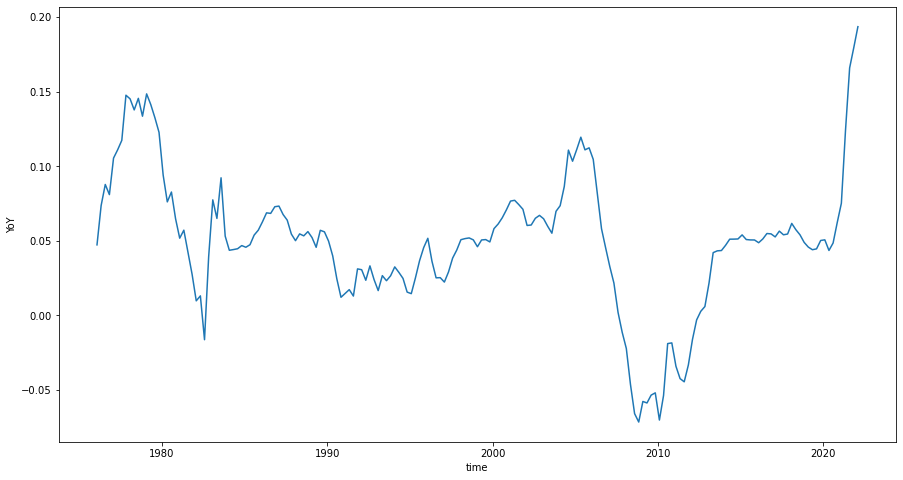

In [65]:
# Now, let's plot YoY for the Fred data

sns.lineplot(x = "time", y = "YoY",
             data = HPI_Fred)
plt.gcf().set_size_inches(15, 8)

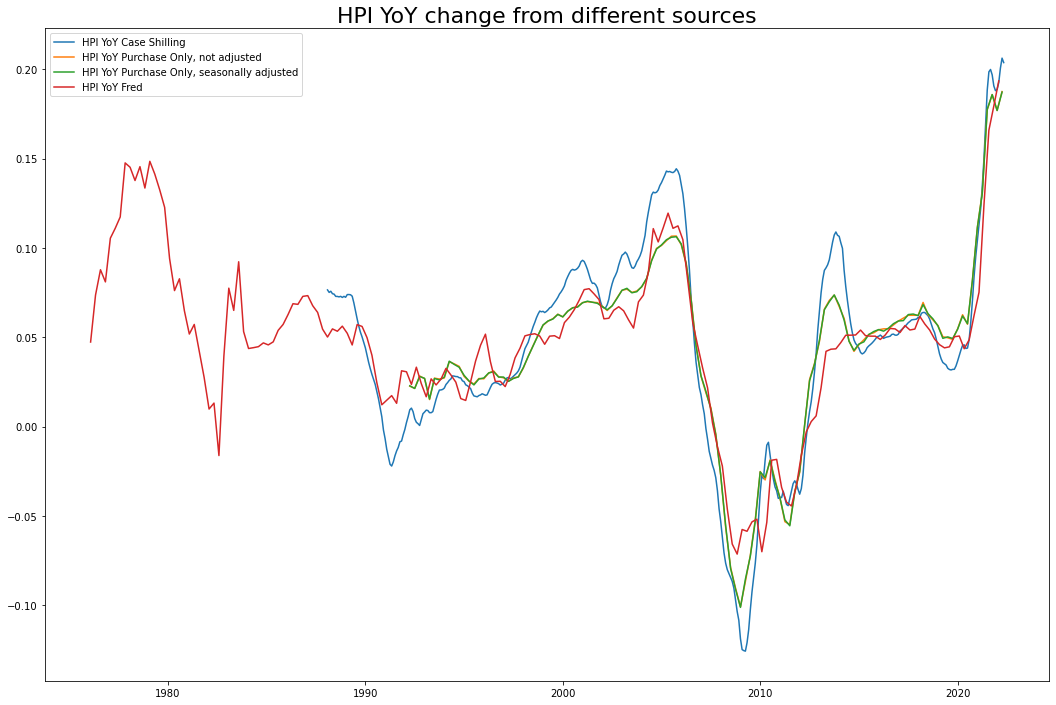

In [66]:
# Now let's plot all four HPI YoY % time series graphs

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY Case Shilling")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_not_seasonally_adjusted, label = "HPI YoY Purchase Only, not adjusted")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_seasonally_adjusted, label = "HPI YoY Purchase Only, seasonally adjusted")
plt.plot(HPI_Fred.time, HPI_Fred.YoY, label = "HPI YoY Fred")
plt.title("HPI YoY change from different sources", size = 22)
plt.legend();

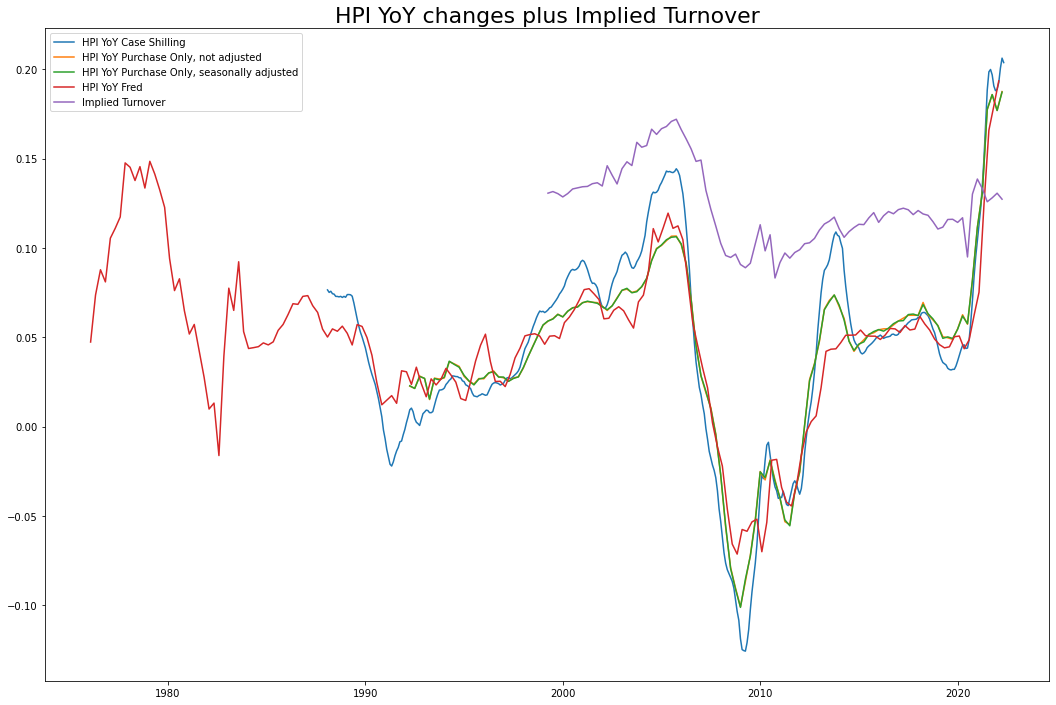

In [67]:
# Now let's plot all four HPI YoY % time series graphs Plus the implied turnover

plt.figure(figsize=(18,12))
plt.plot(HPI.time, HPI.YoYChange, label = "HPI YoY Case Shilling")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_not_seasonally_adjusted, label = "HPI YoY Purchase Only, not adjusted")
plt.plot(HPI_PO.time, HPI_PO.YoYChange_seasonally_adjusted, label = "HPI YoY Purchase Only, seasonally adjusted")
plt.plot(HPI_Fred.time, HPI_Fred.YoY, label = "HPI YoY Fred")
plt.plot(StockQuarterly.time, StockQuarterly.implied_turnover, label = "Implied Turnover")
plt.title("HPI YoY changes plus Implied Turnover", size = 22)
plt.legend();